# How to Train YOLOv5 on Custom Objects

This tutorial is based on the [YOLOv5 repository](https://github.com/ultralytics/yolov5) by [Ultralytics](https://www.ultralytics.com/). This notebook shows training on **your own custom objects**. Many thanks to Ultralytics for putting this repository together - we hope that in combination with clean data management tools at Roboflow, this technologoy will become easily accessible to any developer wishing to use computer vision in their projects.

### Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on [how to train YOLOv5](https://blog.roboflow.ai/how-to-train-yolov5-on-a-custom-dataset/), concurrently.

### Steps Covered in this Tutorial

In this tutorial, we will walk through the steps required to train YOLOv5 on your custom objects. We use a [public blood cell detection dataset](https://public.roboflow.ai/object-detection/bccd), which is open source and free to use. You can also use this notebook on your own data.

To train our detector we take the following steps:

* Install YOLOv5 dependencies
* Download custom YOLOv5 object detection data
* Write our YOLOv5 Training configuration
* Run YOLOv5 training
* Evaluate YOLOv5 performance
* Visualize YOLOv5 training data
* Run YOLOv5 inference on test images
* Export saved YOLOv5 weights for future inference



### **About**

[Roboflow](https://roboflow.com) enables teams to deploy custom computer vision models quickly and accurately. Convert data from to annotation format, assess dataset health, preprocess, augment, and more. It's free for your first 1000 source images.

**Looking for a vision model available via API without hassle? Try Roboflow Train.**

![Roboflow Wordmark](https://i.imgur.com/dcLNMhV.png)



[YOLOv5 Archtecture](https://towardsai.net/p/computer-vision/yolo-v5%E2%80%8A-%E2%80%8Aexplained-and-demystified)

[YOLOv5 New Version - Improvements And Evaluation](https://blog.roboflow.com/yolov5-improvements-and-evaluation/)

[mAP (mean Average Precision) for Object Detection](https://jonathan-hui.medium.com/map-mean-average-precision-for-object-detection-45c121a31173)

What are the two losses?
When training a multi-object detector, you usually have (at least) two types of losses:

    loss_bbox: a loss that measures how "tight" the predicted bounding boxes are to the ground truth object (usually a regression loss, L1, smoothL1 etc.).

    loss_cls: a loss that measures the correctness of the classification of each predicted bounding box: each box may contain an object class, or a "background". 
    This loss is usually called cross entropy loss.

#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [ ]:
# clone YOLOv5 repository
# git clone https://github.com/ultralytics/yolov5.git  # clone repo manually from terminal
# cd yolov5
# git reset --hard 886f1c03d839575afecb059accf74296fad395b6

# install dependencies as necessary
# !pip install -qr requirements.txt  #install dependencies (ignore errors)

In [1]:
import torch
from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.10.2+cu113 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3070', major=8, minor=6, total_memory=8191MB, multi_processor_count=46)


# Download Correctly Formatted Custom Dataset 

We'll download our dataset from Roboflow. Use the "**YOLOv5 PyTorch**" export format. Note that the Ultralytics implementation calls for a YAML file defining where your training and test data is. The Roboflow export also writes this format for us.

To get your data into Roboflow, follow the [Getting Started Guide](https://blog.roboflow.ai/getting-started-with-roboflow/).



![YOLOv5 PyTorch export](https://i.imgur.com/5vr9G2u.png)


In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data

import yaml

DATA_PATH = 'C:\\Users\\Jonathan\\Documents\\GitHub\\DeepLearning-PkLot-YOLOv5'

with open(r'C:\\Users\\Jonathan\\Documents\\GitHub\\DeepLearning-PkLot-YOLOv5\\data.yaml') as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    data_yaml = yaml.load(file, Loader=yaml.FullLoader)

    print(data_yaml)

# Define Model Configuration and Architecture

We will write a yaml script that defines the parameters for our model like the number of classes, anchors, and each layer.

You do not need to edit these cells, but you may.

In [ ]:
# define number of classes based on YAML
import yaml
with open(DATA_PATH + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

num_classes

In [ ]:
#this is the model configuration we will use for our tutorial 

with open(r'C:\\Users\\Jonathan\\Documents\\GitHub\\DeepLearning-PkLot-YOLOv5\\yolov5\\models\\yolov5s.yaml') as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    model_config = yaml.load(file, Loader=yaml.FullLoader)

    print(model_config)

# Train Custom YOLOv5 Detector

### Next, we'll fire off training!


Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J))
- **name:** result names
- **nosave:** only save the final checkpoint
- **cache:** cache images for faster training

In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance

!python train.py --img 640 --batch 2 --epochs 100 --data C:\Users\Jonathan\Documents\GitHub\DeepLearning-PkLot-YOLOv5\data.yaml --cfg C:\Users\Jonathan\Documents\GitHub\DeepLearning-PkLot-YOLOv5\yolov5\models\yolov5s.yaml --name yolov5s_results --weights None --device 0 --cache

# Evaluate Custom YOLOv5 Detector Performance

Training losses and performance metrics are saved to Tensorboard and also to a logfile defined above with the **--name** flag when we train. In our case, we named this `yolov5s_results`. (If given no name, it defaults to `results.txt`.) The results file is plotted as a png after training completes.

Note from Glenn: Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`.

In [ ]:
# To View Graphes:
# cd into yolov5 and run:

# tensorboard --logdir runs\train

### Curious? Visualize Our Training Data with Labels

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects.

Note a mosaic dataloader is used for training (shown below), a new dataloading concept developed by Glenn Jocher and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

GROUND TRUTH TRAINING DATA:


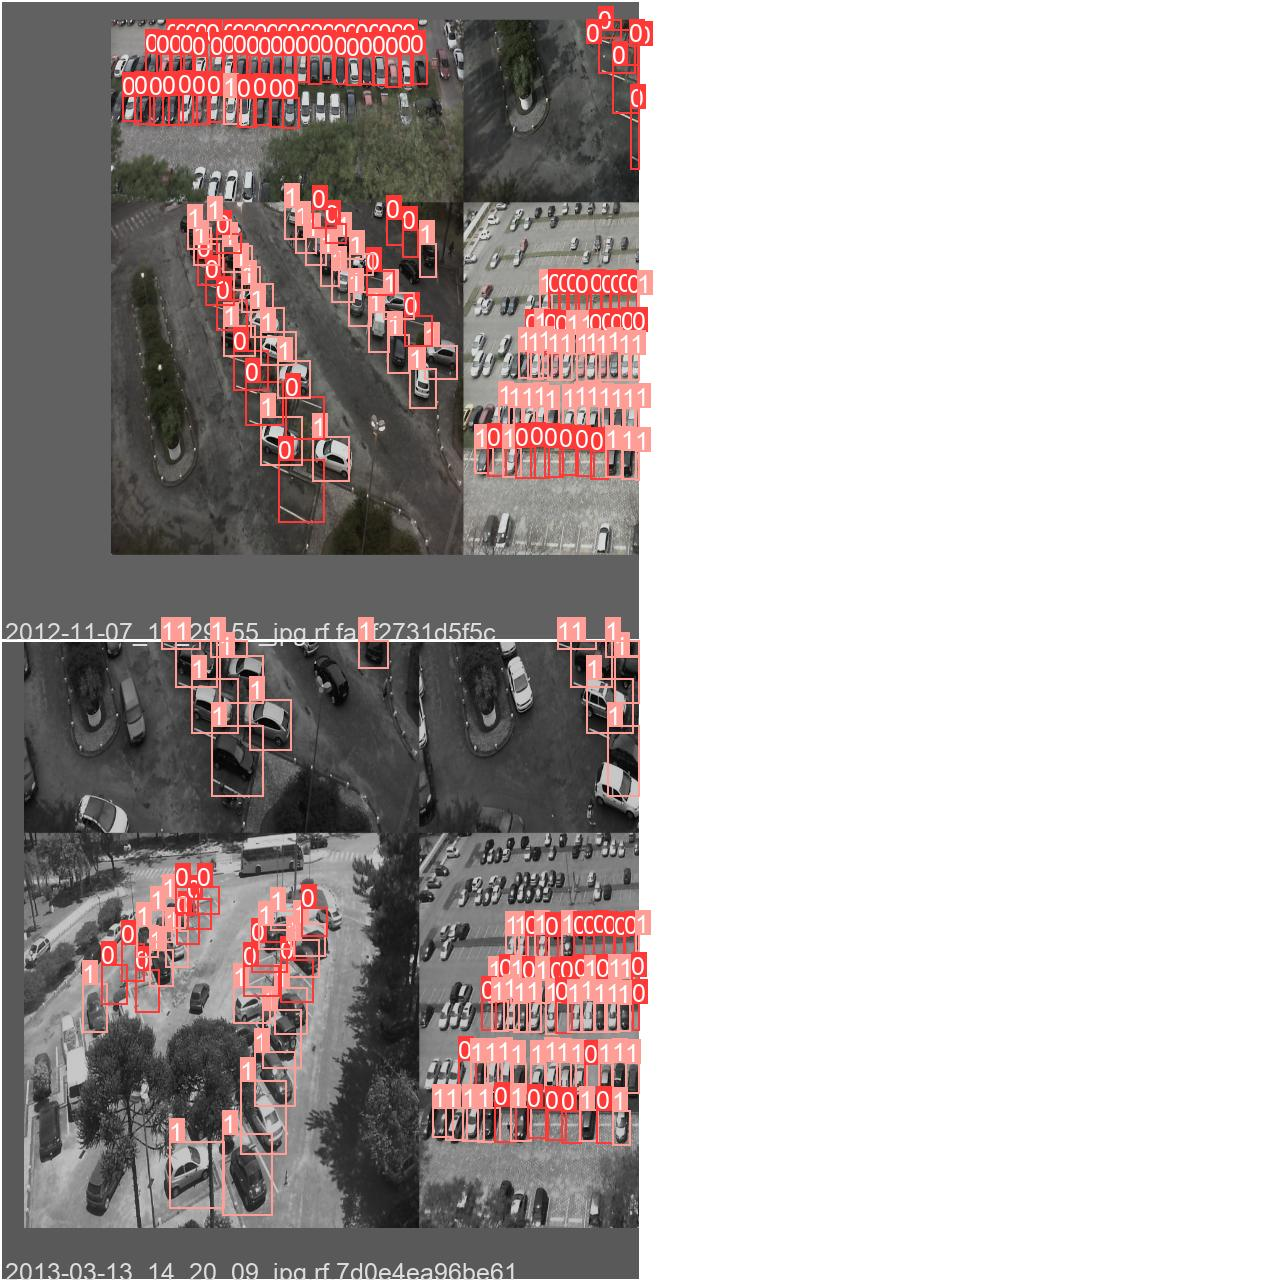

In [3]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='C:\\Users\\Jonathan\\Documents\\GitHub\\DeepLearning-PkLot-YOLOv5\\yolov5\\runs\\train\\yolov5s_results5\\train_batch2.jpg', width=900)

In [ ]:
# use the best weights!

# test images:
!python detect.py --weights C:\Users\Jonathan\Documents\GitHub\DeepLearning-PkLot-YOLOv5\yolov5\runs\train\yolov5s_results6\weights\best.pt --img 640 --conf 0.9 --source C:\Users\Jonathan\Documents\GitHub\DeepLearning-PkLot-YOLOv5\test\images

PREDICTED DATA:


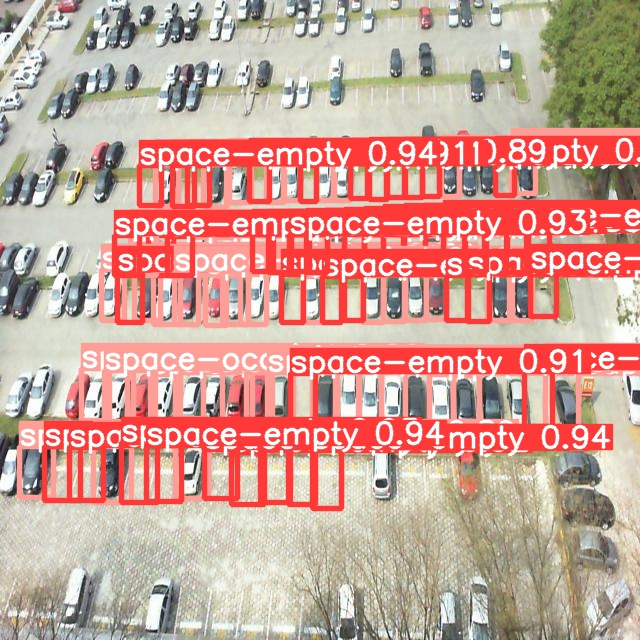

In [4]:
# print out predicted data example
print("PREDICTED DATA:")
Image(filename='C:\\Users\\Jonathan\\Documents\\GitHub\\DeepLearning-PkLot-YOLOv5\\yolov5\\runs\\detect\\exp2\\2012-09-12_14_12_08_jpg.rf.667489b9945bf933e519cc5c39c3a084.jpg', width=900)

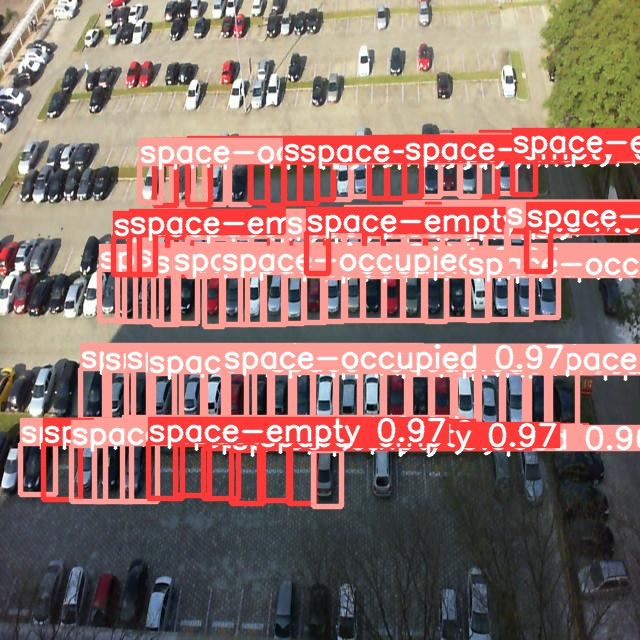

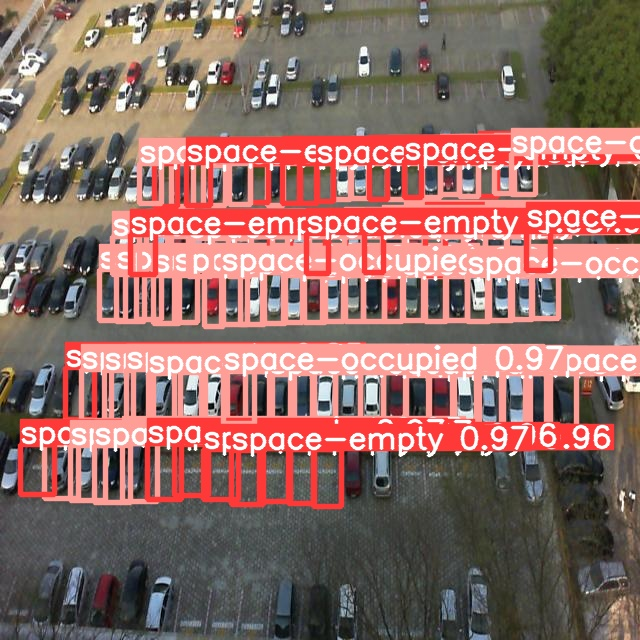

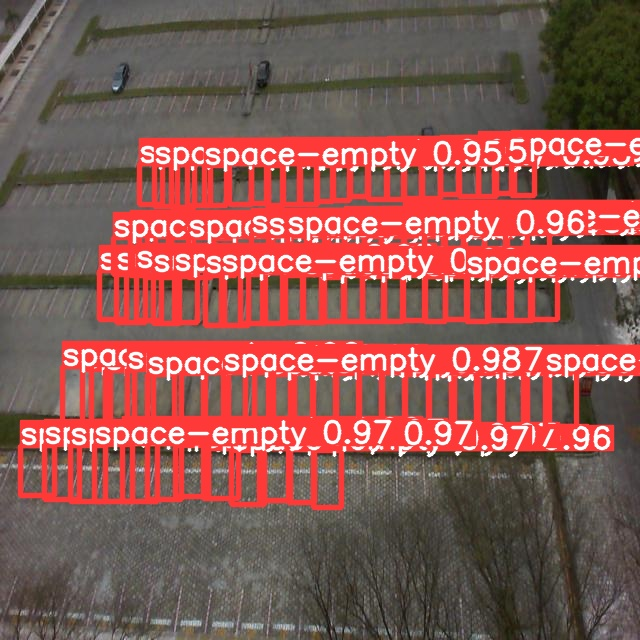

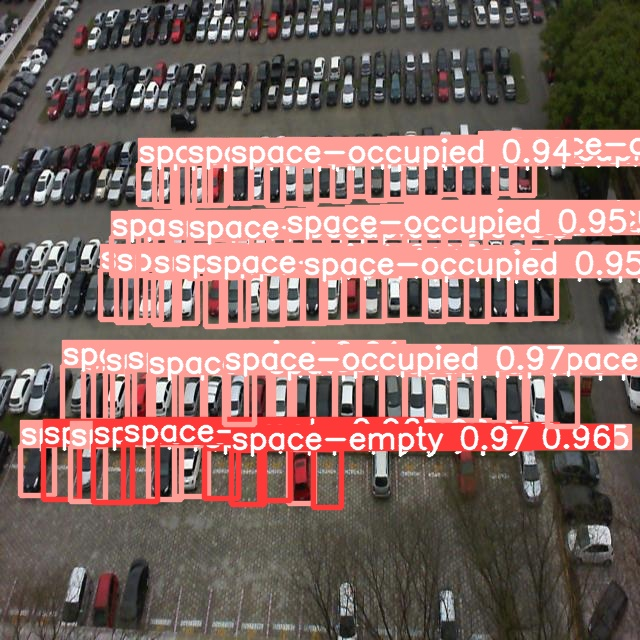

In [2]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

count = 0

for imageName in glob.glob('C:\\Users\\Jonathan\\Documents\\GitHub\\DeepLearning-PkLot-YOLOv5\\yolov5\\runs\\detect\\exp5\\*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")
    count += 1
    if count > 3:
        break

## Congrats!

Hope you enjoyed this!

--Team [Roboflow](https://roboflow.ai)